In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk65 import rk_error_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res
    
def plot_shapes_of_error(continous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name}-plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

def plot_shapes_of_error_two_orders(continous_sol, lower_continous_sol):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            lower_interp_eval = lower_continous_sol.eval(pt)
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - lower_interp_eval) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"plot of errors between two orders")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol =1e-6
    (res, sol, lower_sol, error_samplings, lower_error_samplings) = rk_error_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol.eval(x) for x in t_eval]
    lower_computed_solutions = [lower_sol.eval(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    lower_error = [abs(lower_computed_solution - actual_solution) for (lower_computed_solution, actual_solution) in zip(lower_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="higher_order")
    plt.plot(t_eval, lower_error, label="lower_order")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # shape of errors - graphs
    plt.figure()
    for (x_i, x_i_plus_1, hb) in error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        if maximum_error < 1e-14: continue
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of HIGHER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for (x_i, x_i_plus_1, hb) in lower_error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        if maximum_error < 1e-14: continue
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of LOWER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for ((x_i, x_i_plus_1, lower_hb), (_, _, higher_hb)) in zip(lower_error_samplings, error_samplings):
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            lower_hb_eval  = lower_hb.eval(pt)
            higher_hb_eval = higher_hb.eval(pt)
            error = abs(lower_hb_eval - higher_hb_eval)
            errors.append( error )

        maximum_error = max(errors)
        if maximum_error < 1e-14: continue
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of ESTIMATED errors between interpolants")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled estimated errors')
    # plt.legend()
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

nsteps = 16
nsuccessful_steps = 16
integration complete


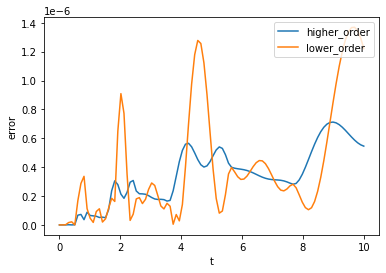

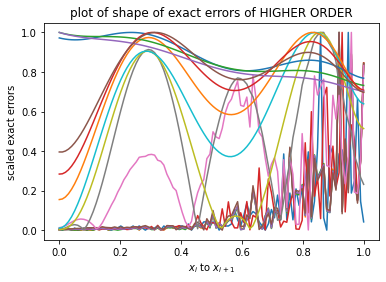

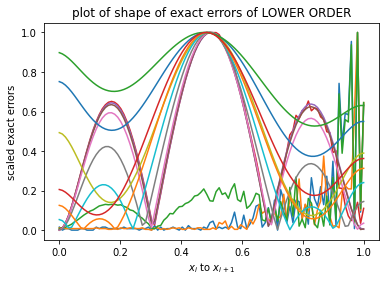

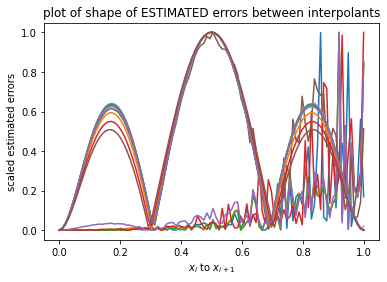

0.0
0.0
2.220446049250313e-16
3.3306690738754696e-16
4.440892098500626e-16
1.3322676295501878e-15
6.661338147750939e-15
3.3306690738754696e-15
6.208478176006338e-12
9.865982475432133e-10
6.158271947942495e-08
4.867991398871396e-08
2.1964205376701074e-07
1.6075691539052528e-07
4.012192195146369e-07
2.816440192177083e-07
4.966222431068701e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 23
nsuccessful_steps = 20
integration complete


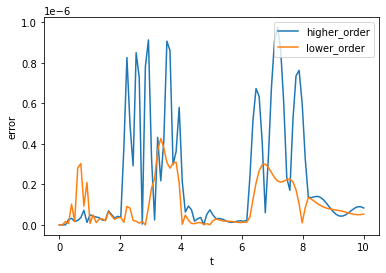

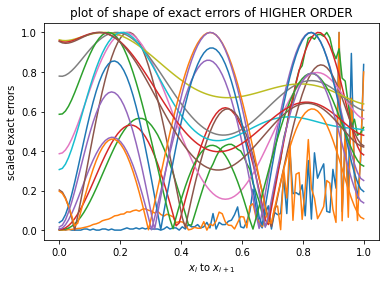

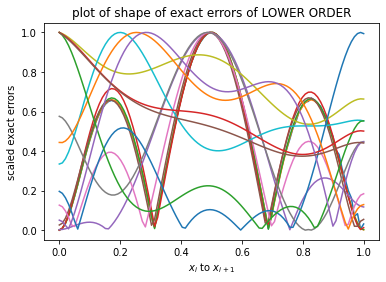

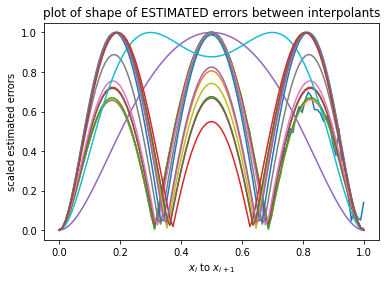

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
7.549516567451064e-15
1.7135182162064666e-12
2.786937347565299e-10
1.4270484682832318e-08
3.002112147765246e-08
4.372927409068694e-08
3.401866338625936e-08
2.2556248757688024e-08
3.726787056734793e-08
1.890052780256779e-07
5.501324522316775e-08
3.0411270966757e-08
1.5235520355733057e-08
1.344530810628436e-07
5.9238918319326483e-08


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 21
nsuccessful_steps = 17
integration complete


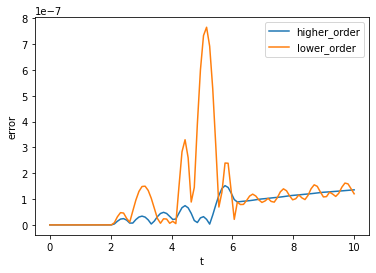

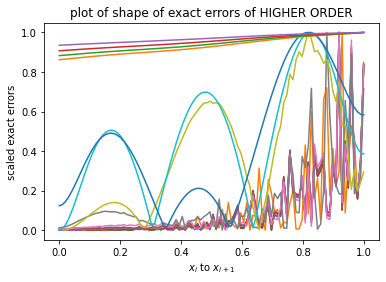

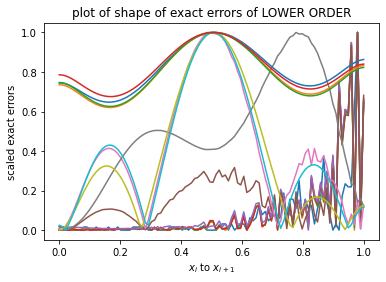

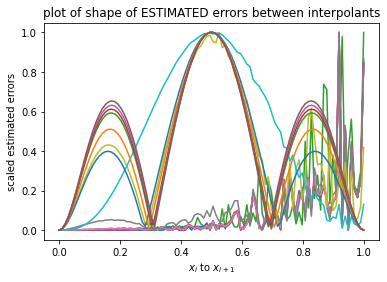

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
0.0
3.9968028886505635e-15
9.769962616701378e-15
4.063416270128073e-14
1.9317880628477724e-13
9.887424212706719e-12
1.8731226791857125e-08
8.860388778231254e-08
1.0276375039808272e-07
1.1638416452797173e-07
1.2825809214689343e-07
1.3711000512728333e-07


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 846
nsuccessful_steps = 626
integration complete


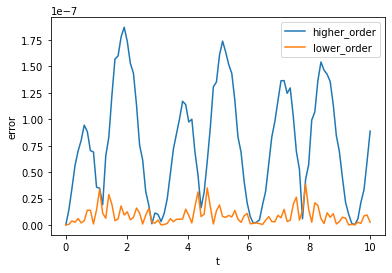

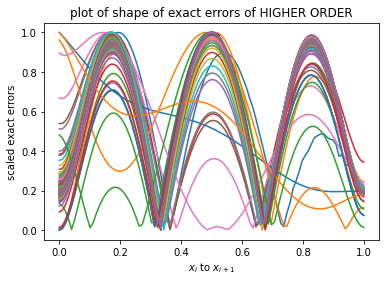

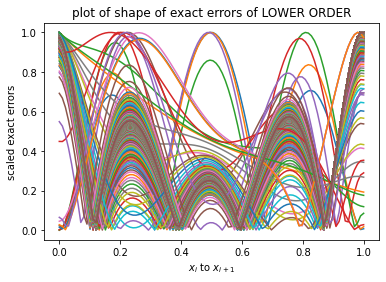

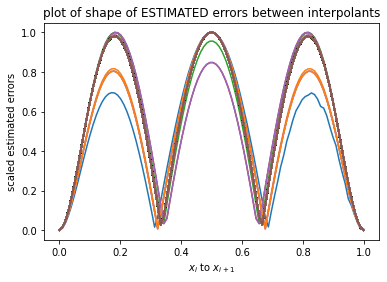

0.0
1.7625739192825285e-16
7.87670709906374e-14
1.849013650523368e-11
2.73700752600331e-09
2.4566123094094117e-09
7.626682033481935e-08
3.1495811549098196e-08
1.0807288869374432e-08
4.673115824860297e-09
3.4327832798553004e-09
3.574563381403273e-09
4.074520457142405e-09
4.661886265910908e-09
5.269322173040436e-09
5.8801286617615744e-09
6.490785936508203e-09
7.100042720420419e-09
7.70727634491486e-09
8.31275007162624e-09
8.916148486193265e-09
9.517111432266745e-09
1.0115620063810837e-08
1.0711544318198207e-08
1.1304876201823078e-08
1.1895196161404442e-08
1.2482488653819956e-08
1.3066559667596067e-08
1.3647448449116695e-08
1.422463069555846e-08
1.4798301861684848e-08
1.5368258055037387e-08
1.5934032482345373e-08
1.649594139063737e-08
1.705357816073061e-08
1.76068327140122e-08
1.8155409842179893e-08
1.8699818360445875e-08
1.9238784565445144e-08
1.977327457325373e-08
2.030245060957725e-08
2.0826660285244714e-08
2.13455239039817e-08
2.1858827525811364e-08
2.2366395291406604e-08
2.2868432592

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 347
nsuccessful_steps = 247
integration complete


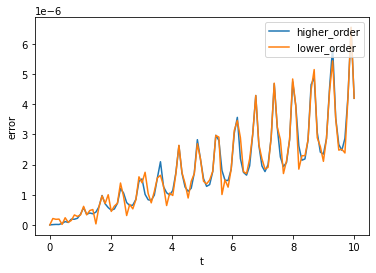

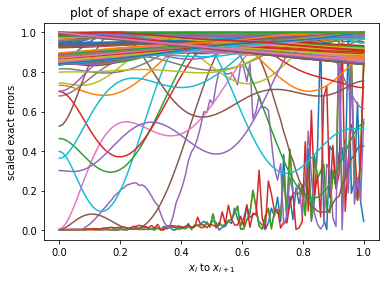

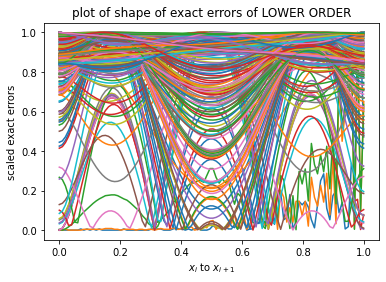

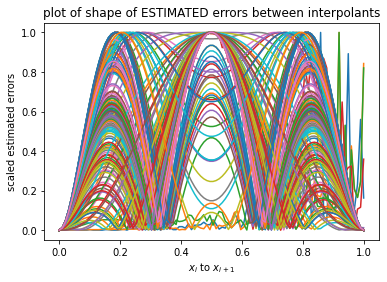

0.0
0.0
8.881784197001252e-16
3.552713678800501e-15
6.217248937900877e-15
3.9035441545820504e-13
7.755973641110359e-11
1.0954574580779308e-08
1.5613667692093713e-08
1.985966679995954e-08
2.5569971473515807e-08
2.9496182385457814e-08
3.503067658172654e-08
4.075795279057104e-08
4.193617386683002e-08
8.566812570443005e-08
1.2272666150003886e-07
1.0448275089558479e-07
9.344586682225042e-08
8.195539136224284e-08
1.8909647048204192e-07
1.8459727835207218e-07
1.8573395799137415e-07
2.010701614096888e-07
2.3787705893951738e-07
2.684142841324899e-07
3.1182646642591294e-07
3.7112320394605547e-07
4.392185104507007e-07
4.96351331591427e-07
5.020002908917576e-07
5.179702839974709e-07
4.381922054097487e-07
3.7309494671511345e-07
3.209854742003415e-07
4.025932778262131e-07
3.738601699332378e-07
3.68380125959078e-07
3.934001711058954e-07
4.6039331769165415e-07
5.174233348448354e-07
5.98646138438852e-07
7.106253461230949e-07
8.467156047409219e-07
9.622943994980204e-07
9.827514078075694e-07
9.6669832072

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 17
nsuccessful_steps = 17
integration complete


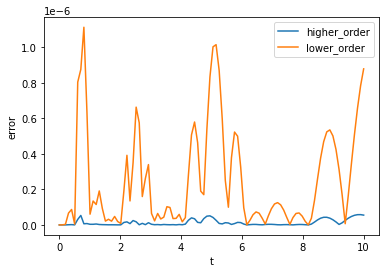

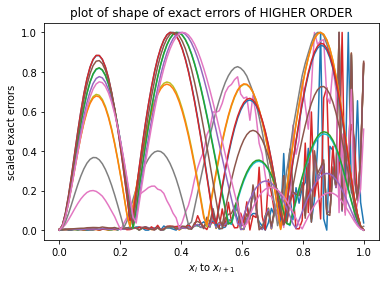

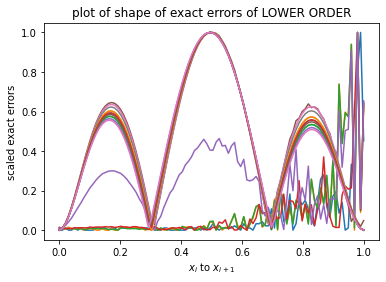

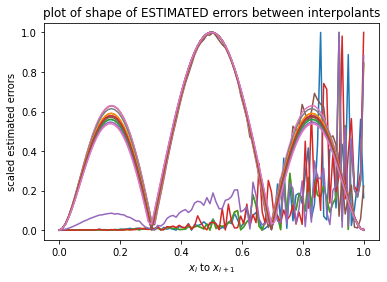

0.0
2.220446049250313e-16
3.3306690738754696e-16
5.551115123125783e-16
1.1102230246251565e-15
1.6653345369377348e-15
7.105427357601002e-15
2.4646951146678475e-14
1.333377852574813e-13
3.6270986214503864e-13
8.413825192121749e-13
8.438805210175815e-13
8.311129562343922e-13
8.928691119791665e-13
8.15791878494565e-13
6.042388811522414e-13
5.071221220731559e-13
5.06511499409612e-13


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 37
nsuccessful_steps = 25
integration complete


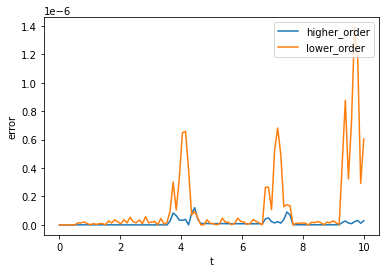

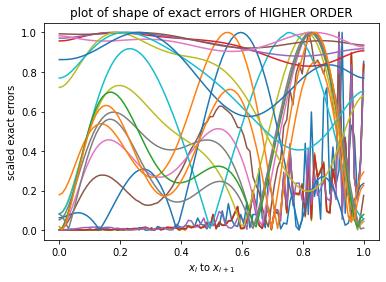

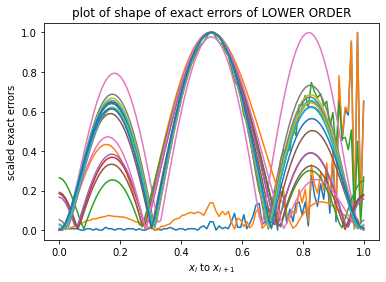

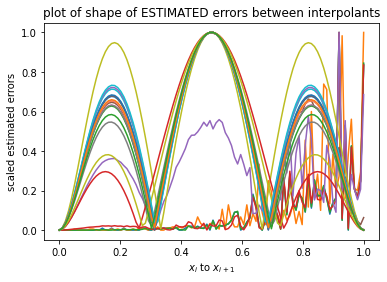

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-15
1.5543122344752192e-15
3.7569947153315297e-13
7.460493334221496e-11
8.880701729552243e-11
4.694700184160183e-11
3.370892454057639e-11
1.2773970770041387e-10
2.0932722222255506e-10
9.7333332782501e-09
9.225338354346135e-09
8.710838106384955e-09
8.206807566857321e-09
7.731185192039192e-09
1.0010056672449252e-09
9.386119936838355e-10
8.549267405122407e-10
7.623807696255369e-10
1.0224950830473034e-08


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 31
nsuccessful_steps = 24
integration complete


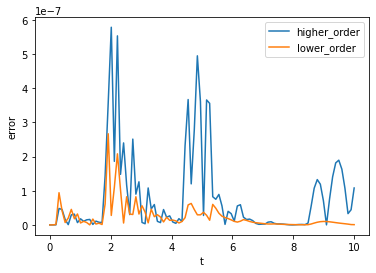

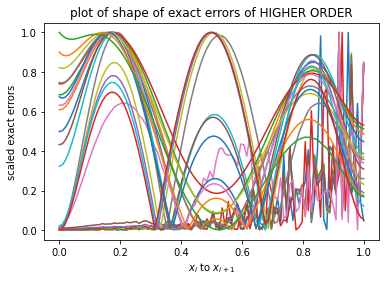

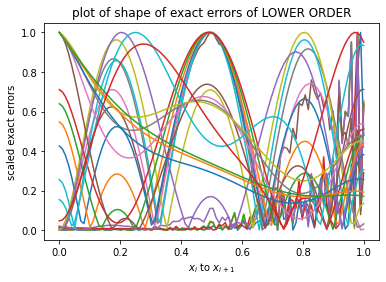

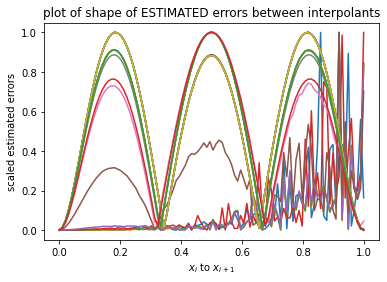

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-15
3.774758283725532e-15
1.1102230246251565e-14
3.6637359812630166e-14
2.8332891588433995e-13
6.572031807650092e-11
1.3217249739128079e-08
1.581814385032132e-08
1.4212168220062438e-08
1.135320826239905e-08
8.503444948182448e-09
6.114281192459714e-09
1.2237214097599036e-07
8.7112328239769e-08
4.67890139965732e-08
2.2371028141066063e-08
1.0032232600210023e-08
6.067981361823627e-08
1.5467282121761627e-08
2.971051848987827e-09
5.051501439368167e-10
1.026084728295018e-08


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)